In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential #딥러닝을 위한 텐서플로우 라이브러리
from tensorflow.keras.layers import Dense #딥러닝을 위한 텐서플로우 라이브러리
# 데이터 불러오기
data = pd.read_csv('부여시_기온.csv', encoding='cp949')
print(data)

      지점번호 지점명          일시  평균기온  최고기온 최고기온시각  최저기온 최저기온시각    일교차   카운트
0      236  부여  2019-01-01  -2.7   1.0  16:04  -5.8  06:57   ,6.8     1
1      236  부여  2019-01-02  -4.5   2.9  13:33 -10.1  06:51    ,13     2
2      236  부여  2019-01-03  -4.2   5.4  15:07 -10.9  07:12  ,16.3     3
3      236  부여  2019-01-04  -3.6   3.3  15:22 -10.2  07:05  ,13.5     4
4      236  부여  2019-01-05  -2.0   4.4  14:53  -7.0  23:54  ,11.4     5
...    ...  ..         ...   ...   ...    ...   ...    ...    ...   ...
2099   236  부여  2024-09-19  28.4  34.8  14:50  24.0  02:49  ,10.8  2100
2100   236  부여  2024-09-20  25.9  27.5  00:20  24.3  09:12   ,3.2  2101
2101   236  부여  2024-09-21  22.8  26.7  00:22  20.4  18:16   ,6.3  2102
2102   236  부여  2024-09-22  22.2  27.0  14:17  18.2  06:27   ,8.8  2103
2103   236  부여  2024-09-23  21.0  26.7  14:54  16.7  06:32    ,10  2104

[2104 rows x 10 columns]


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 데이터 불러오기
data = pd.read_csv('부여시_기온.csv', encoding='cp949')

average_temperature = data['평균기온'] # 평균기온을 가져온다.

print(average_temperature)

0       -2.7
1       -4.5
2       -4.2
3       -3.6
4       -2.0
        ... 
2099    28.4
2100    25.9
2101    22.8
2102    22.2
2103    21.0
Name: 평균기온, Length: 2104, dtype: float64


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 데이터 불러오기
data = pd.read_csv('부여시_기온.csv', encoding='cp949')

average_temperature = data['평균기온'] # 평균기온을 가져온다.

data['기온 변화량'] = np.gradient(data['평균기온']) # 일자(카운트)에 대한 총 평균기온 변화량을 가져온다. 이는 평균변화율와 같다.

print(data['기온 변화량'])

0      -1.80
1      -0.75
2       0.45
3       1.10
4       0.10
        ... 
2099   -1.00
2100   -2.80
2101   -1.85
2102   -0.90
2103   -1.20
Name: 기온 변화량, Length: 2104, dtype: float64


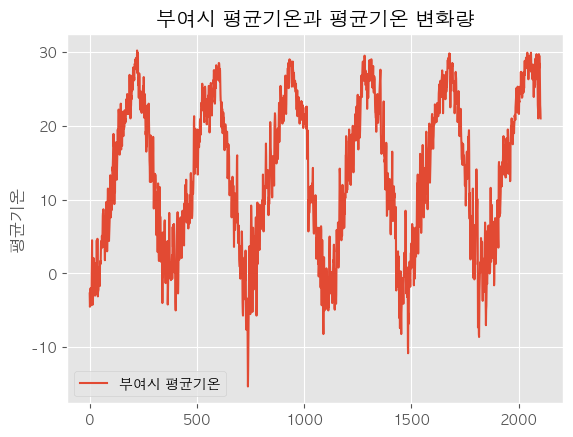

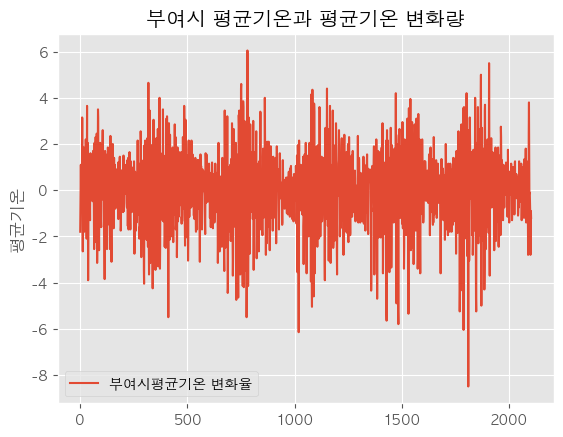

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

plt.rcParams['axes.unicode_minus'] = False

# 데이터 불러오기
data = pd.read_csv('부여시_기온.csv', encoding='cp949')

average_temperature = data['평균기온'] # 평균기온을 가져온다.

data['평균기온 변화량'] = np.gradient(data['평균기온']) # 일자(카운트)에 대한 총 평균기온 변화량을 가져온다. 이는 평균변화율와 같다.

# 시각화 -----------------
plt.plot(data['평균기온'], label='부여시 평균기온')
plt.legend()
plt.ylabel('평균기온')
plt.rc('font', family ='AppleGothic')
plt.style.use('ggplot')
plt.title('부여시 평균기온과 평균기온 변화량')
plt.show()
plt.plot(data['평균기온 변화량'], label='부여시평균기온 변화율')
plt.legend()
plt.ylabel('평균기온')
plt.rc('font', family ='AppleGothic')
plt.style.use('ggplot')
plt.title('부여시 평균기온과 평균기온 변화량')
plt.show()
# ------------------- 시각화 끝

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


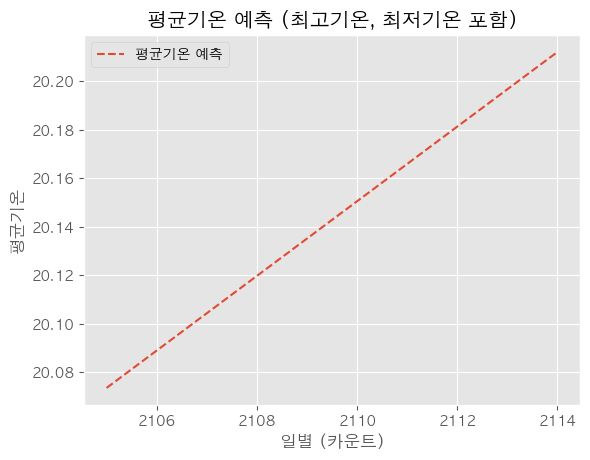

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler

plt.rcParams['axes.unicode_minus'] = False

# 데이터 불러오기
data = pd.read_csv('부여시_기온.csv', encoding='cp949')

# 데이터 확인 및 전처리 (평균기온을 숫자로 변환)
data['평균기온'] = pd.to_numeric(data['평균기온'], errors='coerce')

# NaN 값 제거
data.dropna(subset=['평균기온'], inplace=True)

# 독립 변수 (X) 및 종속 변수 (y) 설정 (다중 입력)
X = data[['카운트']].values  # 1차원 배열 (날짜별)
y = data['평균기온'].values  # 1차원 배열 (평균기온을 예측)

# 데이터 정규화 (Min-Max Scaling)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 예측 모델 구축 (다중 입력 처리)
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=1))  # 1개의 입력을 처리하는 입력층
model.add(Dense(64, activation='relu'))  # 은닉층 추가
model.add(Dense(32, activation='relu'))  # 은닉층 추가
model.add(Dense(1))  # 출력층 (평균기온 예측)

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_scaled, y, epochs=200, verbose=0)

# 미래 예측 (현재 기준 10일 후의 기온 예측)
future_dates = np.array([i for i in range(2105, 2115)]).reshape(-1, 1)

# 입력 데이터를 결합
future_inputs = np.hstack([future_dates])
future_inputs_scaled = scaler.transform(future_inputs)

# 예측
predictions = model.predict(future_inputs_scaled)

# 시각화
plt.plot(future_dates, predictions, label='평균기온 예측', linestyle='dashed')
plt.legend()
plt.ylabel('평균기온')
plt.xlabel('일별 (카운트)')
plt.title('평균기온 예측 (최고기온, 최저기온 포함)')
plt.show()